<a href="https://colab.research.google.com/github/yyyyyuting/Take_Home_Challenge/blob/main/Fetch_Rewards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Code Preface

In [124]:
import json
import pandas as pd
from datetime import datetime
import numpy as np

from ast import literal_eval
!pip install pandasql
import pandasql as ps
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Read Data

In [2]:
with open("users.json") as f:
    data1 = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")
df_users = pd.io.json.json_normalize(data1)

with open("brands.json") as f:
    data2 = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")
df_brands = pd.io.json.json_normalize(data2)

with open("receipts.json") as f:
    data3 = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")

df_receipts = pd.io.json.json_normalize(data3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [3]:
def date_converter(x):
  try:
    return(datetime.utcfromtimestamp(int(x)/1000).strftime('%Y-%m-%d %H:%M:%S'))
  except TypeError:
    return(None)

In [4]:
df_users.head()
df_users['createdDate.$date'] = df_users['createdDate.$date'].apply(lambda x: date_converter(x))
df_users['lastLogin.$date'] = df_users['lastLogin.$date'].fillna(0)
df_users['lastLogin.$date'] = df_users['lastLogin.$date'].apply(lambda x: date_converter(x))

In [5]:
datetime.utcfromtimestamp(int(0)/1000).strftime('%Y-%m-%d %H:%M:%S')

'1970-01-01 00:00:00'

In [6]:
df_users['lastLogin.$date'] = np.where(df_users['lastLogin.$date'] == '1970-01-01 00:00:00', 'NaN', df_users['lastLogin.$date'])

In [7]:
df_users.head()

,active,role,signUpSource,state,_id.$oid,createdDate.$date,lastLogin.$date
0,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03 15:24:04,2021-01-03 15:25:37
1,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03 15:24:04,2021-01-03 15:25:37
2,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03 15:24:04,2021-01-03 15:25:37
3,True,consumer,Email,WI,5ff1e1eacfcf6c399c274ae6,2021-01-03 15:25:30,2021-01-03 15:25:30
4,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03 15:24:04,2021-01-03 15:25:37


In [8]:
df_brands.head()

,barcode,category,categoryCode,name,topBrand,_id.$oid,cpg.$id.$oid,cpg.$ref,brandCode
0,511111019862,Baking,BAKING,test brand @1612366101024,False,601ac115be37ce2ead437551,601ac114be37ce2ead437550,Cogs,NaN
1,511111519928,Beverages,BEVERAGES,Starbucks,False,601c5460be37ce2ead43755f,5332f5fbe4b03c9a25efd0ba,Cogs,STARBUCKS
2,511111819905,Baking,BAKING,test brand @1612366146176,False,601ac142be37ce2ead43755d,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146176
3,511111519874,Baking,BAKING,test brand @1612366146051,False,601ac142be37ce2ead43755a,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146051
4,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,False,601ac142be37ce2ead43755e,5332fa12e4b03c9a25efd1e7,Cogs,TEST BRANDCODE @1612366146827


In [9]:
df_receipts.head()

,bonusPointsEarned,bonusPointsEarnedReason,pointsEarned,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId,_id.$oid,createDate.$date,dateScanned.$date,finishedDate.$date,modifyDate.$date,pointsAwardedDate.$date,purchaseDate.$date
0,500.0,"Receipt number 2 completed, bonus point schedu...",500.0,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575,1609687531000,1609687531000,1.609688e+12,1609687536000,1.609688e+12,1.609632e+12
1,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,1609687483000,1609687483000,1.609687e+12,1609687488000,1.609687e+12,1.609601e+12
2,5.0,All-receipts receipt bonus,5,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a,1609687537000,1609687537000,NaN,1609687542000,NaN,1.609632e+12
3,5.0,All-receipts receipt bonus,5.0,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f,1609687534000,1609687534000,1.609688e+12,1609687539000,1.609688e+12,1.609632e+12
4,5.0,All-receipts receipt bonus,5.0,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052,5ff1e1d20a7214ada1000561,1609687506000,1609687506000,1.609688e+12,1609687511000,1.609688e+12,1.609601e+12


'rewardsReceiptitemList' column contains lists of receipts, need further step to split them and get the columns from it.

In [10]:
d = df_receipts['rewardsReceiptItemList'].apply(pd.Series)
df2 = pd.json_normalize(d[0])
df2

#Convert date time
df_receipts = pd.concat([df_receipts, df2], axis = 1)
df_receipts.drop(columns = ['rewardsReceiptItemList'],inplace = True)
df_receipts.head()
df_receipts['createDate.$date'] = df_receipts['createDate.$date'].apply(lambda x: date_converter(x))

df_receipts['dateScanned.$date'] = df_receipts['dateScanned.$date'].apply(lambda x: date_converter(x))
# has NaN as float in table, fill with 0 first them change back to NaN
df_receipts['finishedDate.$date'] = df_receipts['finishedDate.$date'].fillna(0)
df_receipts['finishedDate.$date'] = df_receipts['finishedDate.$date'].apply(lambda x: date_converter(x))
df_receipts['finishedDate.$date'] = np.where(df_receipts['finishedDate.$date'] == '1970-01-01 00:00:00', 'NaN', df_receipts['finishedDate.$date'])

df_receipts['modifyDate.$date'] = df_receipts['modifyDate.$date'].apply(lambda x: date_converter(x))

df_receipts['pointsAwardedDate.$date'] = df_receipts['pointsAwardedDate.$date'].fillna(0)
df_receipts['pointsAwardedDate.$date'] = df_receipts['pointsAwardedDate.$date'].apply(lambda x: date_converter(x))
df_receipts['pointsAwardedDate.$date'] = np.where(df_receipts['pointsAwardedDate.$date'] == '1970-01-01 00:00:00', 'NaN', df_receipts['pointsAwardedDate.$date'])

df_receipts['purchaseDate.$date'] = df_receipts['purchaseDate.$date'].fillna(0)
df_receipts['purchaseDate.$date'] = df_receipts['purchaseDate.$date'].apply(lambda x: date_converter(x))
df_receipts['purchaseDate.$date'] = np.where(df_receipts['purchaseDate.$date'] == '1970-01-01 00:00:00', 'NaN', df_receipts['purchaseDate.$date'])


In [11]:
df_receipts.head()

,bonusPointsEarned,bonusPointsEarnedReason,pointsEarned,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId,_id.$oid,createDate.$date,dateScanned.$date,...,itemNumber,needsFetchReviewReason,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,userFlaggedDescription,deleted,priceAfterCoupon,metabriteCampaignId
0,500.0,"Receipt number 2 completed, bonus point schedu...",500.0,5.0,FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575,2021-01-03 15:25:31,2021-01-03 15:25:31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,2021-01-03 15:24:43,2021-01-03 15:24:43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,All-receipts receipt bonus,5,1.0,REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a,2021-01-03 15:25:37,2021-01-03 15:25:37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,All-receipts receipt bonus,5.0,4.0,FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f,2021-01-03 15:25:34,2021-01-03 15:25:34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,All-receipts receipt bonus,5.0,2.0,FINISHED,1.00,5ff1e194b6a9d73a3a9f1052,5ff1e1d20a7214ada1000561,2021-01-03 15:25:06,2021-01-03 15:25:06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_receipts.columns.tolist()

['bonusPointsEarned',
 'bonusPointsEarnedReason',
 'pointsEarned',
 'purchasedItemCount',
 'rewardsReceiptStatus',
 'totalSpent',
 'userId',
 '_id_$oid',
 'createDate_$date',
 'dateScanned_$date',
 'finishedDate_$date',
 'modifyDate_$date',
 'pointsAwardedDate_$date',
 'purchaseDate_$date',
 'barcode',
 'description',
 'finalPrice',
 'itemPrice',
 'needsFetchReview',
 'partnerItemId',
 'preventTargetGapPoints',
 'quantityPurchased',
 'userFlaggedBarcode',
 'userFlaggedNewItem',
 'userFlaggedPrice',
 'userFlaggedQuantity',
 'originalMetaBriteBarcode',
 'originalMetaBriteDescription',
 'pointsNotAwardedReason',
 'pointsPayerId',
 'rewardsGroup',
 'rewardsProductPartnerId',
 'brandCode',
 'competitorRewardsGroup',
 'discountedItemPrice',
 'originalReceiptItemText',
 'itemNumber',
 'needsFetchReviewReason',
 'originalMetaBriteQuantityPurchased',
 'pointsEarned',
 'targetPrice',
 'competitiveProduct',
 'userFlaggedDescription',
 'deleted',
 'priceAfterCoupon',
 'metabriteCampaignId']

 ### First: Review Existing Unstructured Data and Diagram a New Structured Relational Data Model

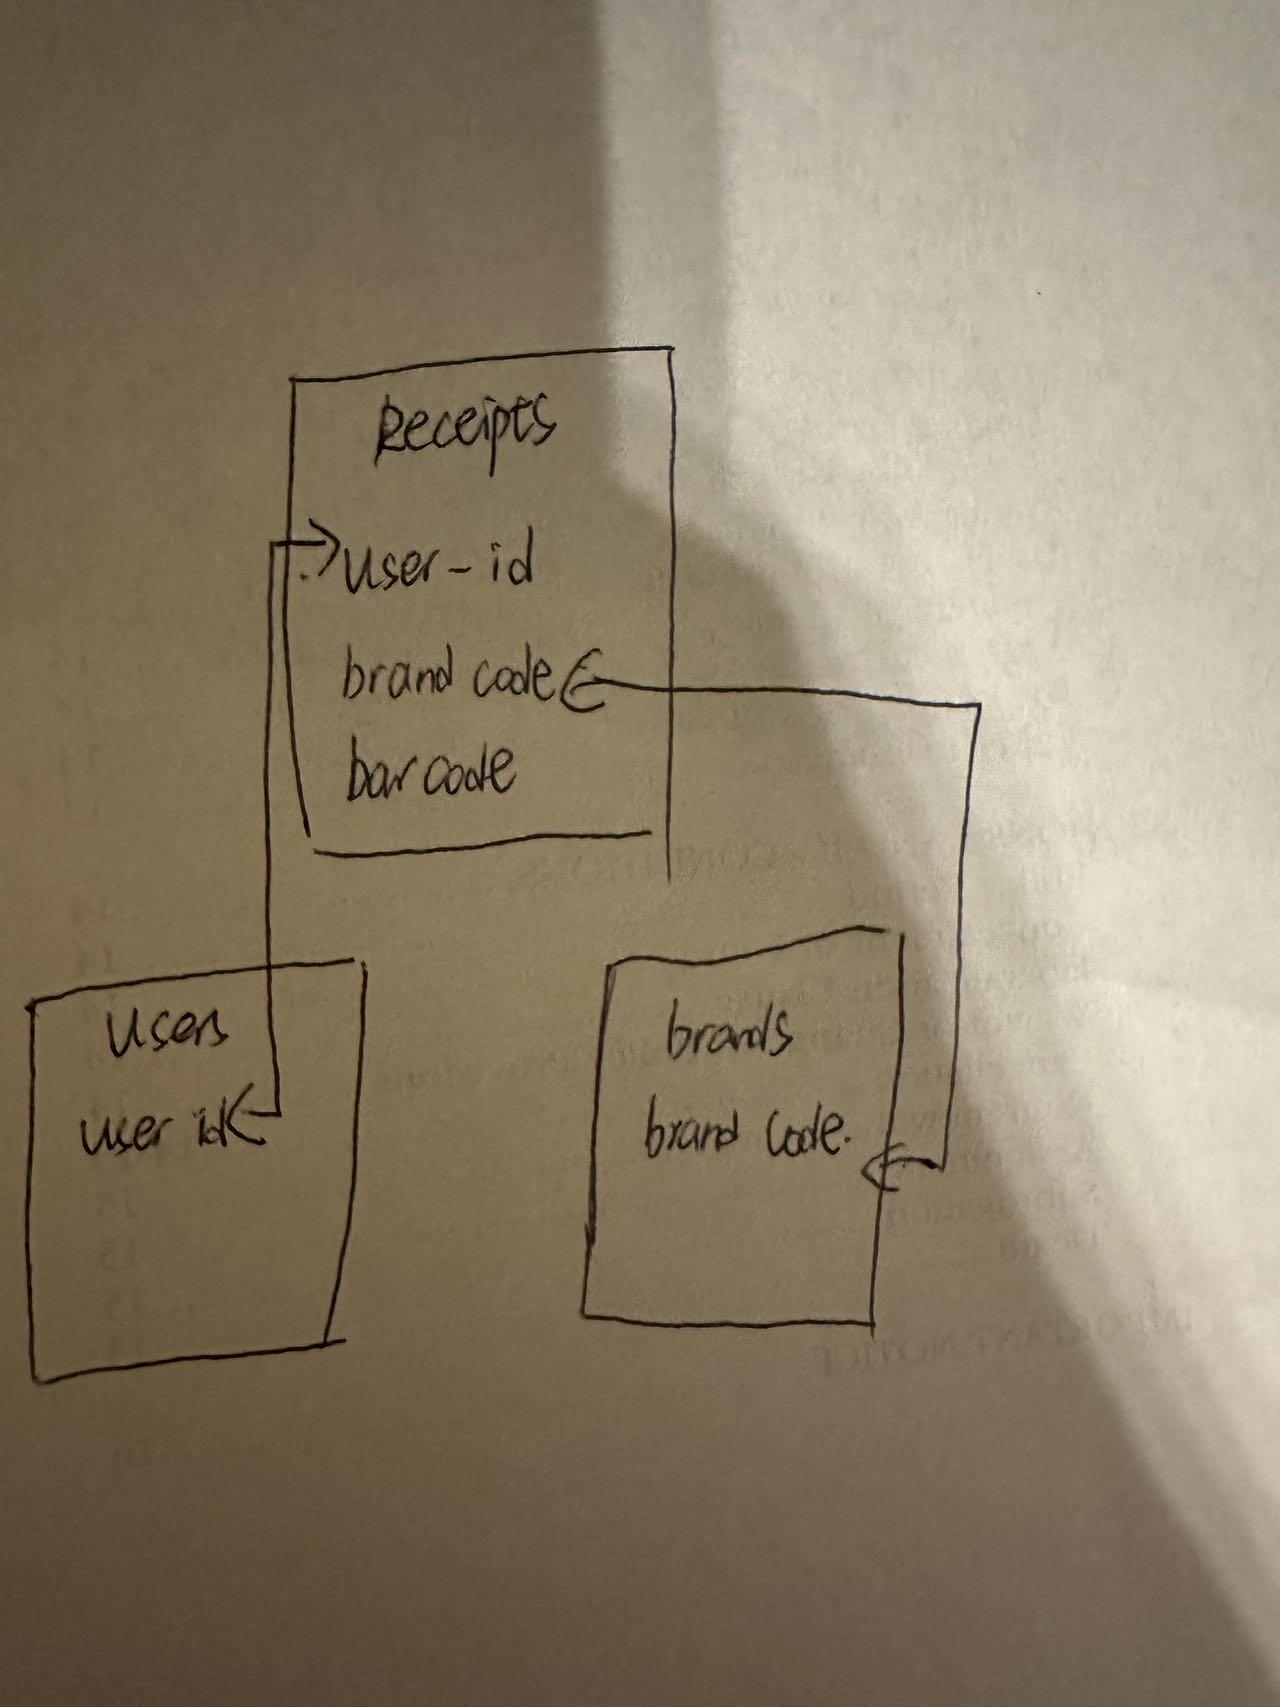

### Second: Write a query that directly answers a predetermined question from a business stakeholder

In [54]:
# engine = create_engine('sqlite://', echo=False)
# df_users.to_sql('users',con=engine)
df_receipts.columns = df_receipts.columns.str.replace(".", "_")
# df_receipts.to_sql('receipts',con=engine)
df_brands.drop_duplicates(subset=['brandCode'])
df_users.columns = df_users.columns.str.replace(".", "_")
# .to_sql('brands',con=engine)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [60]:
df_receipts.columns.tolist()

['bonusPointsEarned',
 'bonusPointsEarnedReason',
 'pointsEarned',
 'purchasedItemCount',
 'rewardsReceiptStatus',
 'totalSpent',
 'userId',
 '_id_$oid',
 'createDate_$date',
 'dateScanned_$date',
 'finishedDate_$date',
 'modifyDate_$date',
 'pointsAwardedDate_$date',
 'purchaseDate_$date',
 'barcode',
 'description',
 'finalPrice',
 'itemPrice',
 'needsFetchReview',
 'partnerItemId',
 'preventTargetGapPoints',
 'quantityPurchased',
 'userFlaggedBarcode',
 'userFlaggedNewItem',
 'userFlaggedPrice',
 'userFlaggedQuantity',
 'originalMetaBriteBarcode',
 'originalMetaBriteDescription',
 'pointsNotAwardedReason',
 'pointsPayerId',
 'rewardsGroup',
 'rewardsProductPartnerId',
 'brandCode',
 'competitorRewardsGroup',
 'discountedItemPrice',
 'originalReceiptItemText',
 'itemNumber',
 'needsFetchReviewReason',
 'originalMetaBriteQuantityPurchased',
 'pointsEarned',
 'targetPrice',
 'competitiveProduct',
 'userFlaggedDescription',
 'deleted',
 'priceAfterCoupon',
 'metabriteCampaignId']

###What are the top 5 brands by receipts scanned for most recent month?

In [108]:
ps.sqldf("SELECT b.name, r.brandCode, temp.benchmark_startdate, temp.benchmark_enddate, COUNT(r._id_$oid) AS num_scanned FROM df_brands AS b JOIN df_receipts AS r INNER JOIN (SELECT b.brandCode, MAX(r.dateScanned_$date) AS benchmark_enddate, DATE(MAX(r.dateScanned_$date), '-1 month') AS benchmark_startdate FROM df_brands AS b JOIN df_receipts AS r ON b.brandCode = r.brandCode) AS temp ON temp.brandCode = r.brandCode AND r.dateScanned_$date > temp.benchmark_startdate AND r.dateScanned_$date <= temp.benchmark_enddate GROUP BY 1,2,3,4 ORDER BY 5 DESC LIMIT 5") 


,name,brandCode,benchmark_startdate,benchmark_enddate,num_scanned
0,Baken-Ets,HUGGIES,2020-12-29,2021-01-29 21:18:24,4
1,Caleb's Kola,HUGGIES,2020-12-29,2021-01-29 21:18:24,4
2,Diabetic Living Magazine,HUGGIES,2020-12-29,2021-01-29 21:18:24,4
3,Dippin Dots® Cereal,HUGGIES,2020-12-29,2021-01-29 21:18:24,4
4,Health Magazine,HUGGIES,2020-12-29,2021-01-29 21:18:24,4


### How does the ranking of the top 5 brands by receipts scanned for the recent month compare to the ranking for the previous month?

In [118]:
ps.sqldf("SELECT b.name, r.brandCode, temp.benchmark_startdate, temp.benchmark_enddate, COUNT(r._id_$oid) AS num_scanned FROM df_brands AS b JOIN df_receipts AS r INNER JOIN (SELECT b.brandCode, DATE(MAX(r.dateScanned_$date), '-1 month') AS benchmark_enddate, DATE(MAX(r.dateScanned_$date), '-2 month') AS benchmark_startdate FROM df_brands AS b JOIN df_receipts AS r ON b.brandCode = r.brandCode) AS temp ON temp.brandCode = r.brandCode AND r.dateScanned_$date > temp.benchmark_startdate AND r.dateScanned_$date <= temp.benchmark_enddate GROUP BY 1,2,3,4 ORDER BY 5 DESC LIMIT 5") 

#  ps.sqldf('SELECT b.name, COUNT(r._id_$oid) AS num_scanned FROM df_brands AS b JOIN df_receipts AS r  WHERE r.dateScanned_$date BETWEEN "2020-11-29" AND "2020-12-29"')

,name,brandCode,benchmark_startdate,benchmark_enddate,num_scanned


Returnd empty results

###When considering average spend from receipts with 'rewardsReceiptStatus’ of ‘Accepted’ or ‘Rejected’, which is greater?

In [47]:
ps.sqldf('SELECT rewardsReceiptStatus, AVG(totalSpent) AS Average_Spend FROM df_receipts GROUP BY 1 ORDER BY 2 DESC')

,rewardsReceiptStatus,Average_Spend
0,FLAGGED,180.451739
1,FINISHED,80.854305
2,PENDING,28.032449
3,REJECTED,23.326056
4,SUBMITTED,NaN


Average spend of 'Accepted' (Finished) is greater than that of 'Rejected' Status.

### When considering total number of items purchased from receipts with 'rewardsReceiptStatus’ of ‘Accepted’ or ‘Rejected’, which is greater?

In [48]:
ps.sqldf('SELECT rewardsReceiptStatus, SUM(purchasedItemCount) FROM df_receipts GROUP BY 1 ORDER BY 2 DESC')

,rewardsReceiptStatus,SUM(purchasedItemCount)
0,FINISHED,8184.0
1,FLAGGED,1014.0
2,REJECTED,173.0
3,PENDING,NaN
4,SUBMITTED,NaN


Total items purchased of 'Accepted' status is greater than that of 'Rejected' Status.

###Which brand has the most spend among users who were created within the past 6 months?

In [57]:
ps.sqldf('SELECT * from (SELECT r.brandCode,SUM(r.totalSpent) as TotalSpend from df_receipts AS r where r.userId in (SELECT _id_$oid from df_users AS u where u.createdDate_$date > (SELECT strftime("%Y-%m-%d %H:%M:%S", "now","-6 month"))) group by r.brandCode) where brandCode is not NULL order by TotalSpend DESC LIMIT 1')

,brandCode,TotalSpend


###Which brand has the most transactions among users who were created within the past 6 months?

In [58]:
ps.sqldf('SELECT * from (SELECT r.brandCode,SUM(purchasedItemCount) as TotalSpend from df_receipts AS r where r.userId in (SELECT _id_$oid from df_users AS u where u.createdDate_$date > (SELECT strftime("%Y-%m-%d %H:%M:%S", "now","-6 month"))) group by r.brandCode) where brandCode is not NULL order by TotalSpend DESC LIMIT 1')

,brandCode,TotalSpend


In [59]:
ps.sqldf('SELECT createdDate_$date from df_users ORDER BY 1 DESC LIMIT 5')

,createdDate_$date
0,2021-02-12 14:11:06
1,2021-02-12 14:10:49
2,2021-02-11 16:17:53
3,2021-02-11 16:17:49
4,2021-02-11 16:17:07


Question 5 and 6 can not be answered since the most recent created users was created on 2021-2-12, and today's date is 2022-11-13, which has been over 21 months.

###Third: Evaluate Data Quality Issues in the Data Provided

In [119]:
df_receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   bonusPointsEarned                   544 non-null    float64
 1   bonusPointsEarnedReason             544 non-null    object 
 2   pointsEarned                        609 non-null    object 
 3   purchasedItemCount                  635 non-null    float64
 4   rewardsReceiptStatus                1119 non-null   object 
 5   totalSpent                          684 non-null    object 
 6   userId                              1119 non-null   object 
 7   _id_$oid                            1119 non-null   object 
 8   createDate_$date                    1119 non-null   object 
 9   dateScanned_$date                   1119 non-null   object 
 10  finishedDate_$date                  1119 non-null   object 
 11  modifyDate_$date                    1119 no

In [123]:
561/1119

0.5013404825737265

In [120]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   active             495 non-null    bool  
 1   role               495 non-null    object
 2   signUpSource       447 non-null    object
 3   state              439 non-null    object
 4   _id_$oid           495 non-null    object
 5   createdDate_$date  495 non-null    object
 6   lastLogin_$date    495 non-null    object
dtypes: bool(1), object(6)
memory usage: 23.8+ KB


In [121]:
df_brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   barcode       1167 non-null   object
 1   category      1012 non-null   object
 2   categoryCode  517 non-null    object
 3   name          1167 non-null   object
 4   topBrand      555 non-null    object
 5   _id.$oid      1167 non-null   object
 6   cpg.$id.$oid  1167 non-null   object
 7   cpg.$ref      1167 non-null   object
 8   brandCode     933 non-null    object
dtypes: object(9)
memory usage: 82.2+ KB


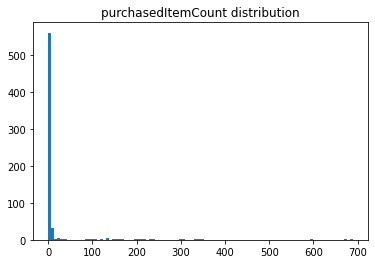

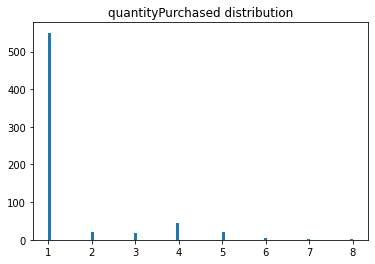

In [126]:
# create a function to plot the histogram
def plot_col_distribution(df, col, bins):
  df[col].hist(bins=bins)
  plt.title(col+" distribution")
  plt.gca().grid(False) 
  plt.show()

# create a function to show histograms for columns whose maximum value
# is greater than a user-defined sigma value
def plot_potential_outliers(df, num_sigma, bins):
  stats = df.describe().transpose()
  cols = stats[stats['max'] > stats['mean'] + stats['std'] * num_sigma].index.tolist()
  for col in cols:
    plot_col_distribution(df, col, bins=bins)

# use the function to see the columns whose maximum is greater than 3 std
plot_potential_outliers(df_receipts, 3, 100)

##Fourth: Communicate with Stakeholders

Hi there,

Good morning, this is Jenny, I am working on rewards data cleaning for last few days. I would like to raise several questions I met so far:

1.There are quite large amount of missing values exist in the receipts 
data especially the barcode (50% missing) and brandcode (96% missing) columns, which would cause the problem when linking the receipts table to other table (e.g. brands table)  

2.Receipts data contains partial item related information, which is stored 
in transactio dimension. I am wondering do we have a item-dimension data the has full information of items. In this way, it is clear for us to build query. 

3.I have found some extrem values (transactions earned 800+ points, 
purchased 500+ items, spent 4000+ dollars) exists in our receipts data. I would recomemded a data quality check to make sure the data is correct.

Let me know do you have any questions or concerns, we can discuss in details in our meetings.

Best,

Jenny